<a href="https://colab.research.google.com/github/fuanonemus/cop4630spring2020/blob/master/HW2_4630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 3D Plots

In [0]:
# imports
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

Function and Variable Initializations

In [0]:
# define equations
f1 = lambda x,y : x**2 + y**2
f2 = lambda x,y : -1 * (x**2 + y**2)
f3 = lambda x,y : x ** 5 + y ** 5

# define variables
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x,y)

# define function
Z1 = f1(X, Y)
Z2 = f2(X, Y)
Z3 = f3(X, Y)

Print Plots

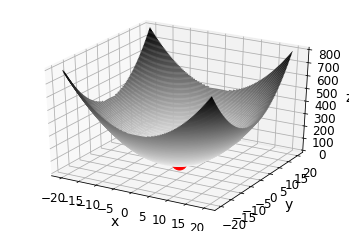

In [0]:
# generate plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# print function 1
ax.contour3D(X, Y, Z1, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# print p1
ax.plot([0], [0], [0], 'ro', markersize=15)

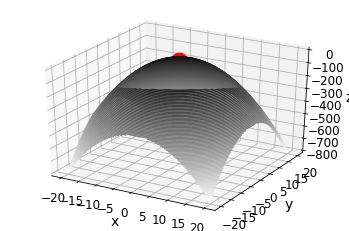

In [0]:
# generate plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# print function 2
ax.contour3D(X, Y, Z2, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# print p2
ax.plot([0], [0], [0], 'ro', markersize=15)

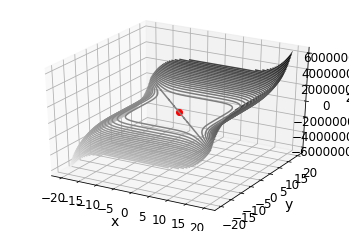

In [0]:
# generate plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# print function 3
ax.contour3D(X, Y, Z3, 100, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# print p3
ax.plot([0], [0], [0], 'ro')

Problem 2 Extend Gradient Descent for Two Weights

Generate Random Data, no change from original

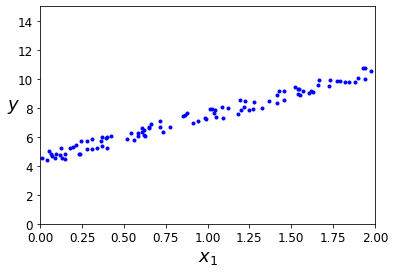

(100, 1)
[[0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]]


In [0]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# generate m random pairs (x, y)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

print(X.shape)

# show the first 5 rows
print(X[:5, :])

Combine Bias and Weights - Changed so X_b and X_new_b have two columns of 1s for three columns total

In [0]:
# add x0 = 1 
X_b = np.hstack([np.ones((m, 2)), X])

print(X_b.shape)

# show the first 5 rows
print(X_b[:5, :])

# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 2)), X_new])

print(X_new_b)

(100, 3)
[[1.         1.         0.31203728]
 [1.         1.         0.31198904]
 [1.         1.         0.11616722]
 [1.         1.         1.73235229]
 [1.         1.         1.20223002]]
[[1. 1. 0.]
 [1. 1. 2.]]


Weight Calculation - Changed so Initial Weight has three rows, thus two weight values and bias

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

# sanity check (I will use this to explain how the vectorized code works)
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

y_predict = X_new_b.dot(weight)
y_predict

(3, 1)
(100, 1)
(100, 1)
(3, 1)


array([[2.28118155],
       [5.58953344]])

Print Graphs, no change

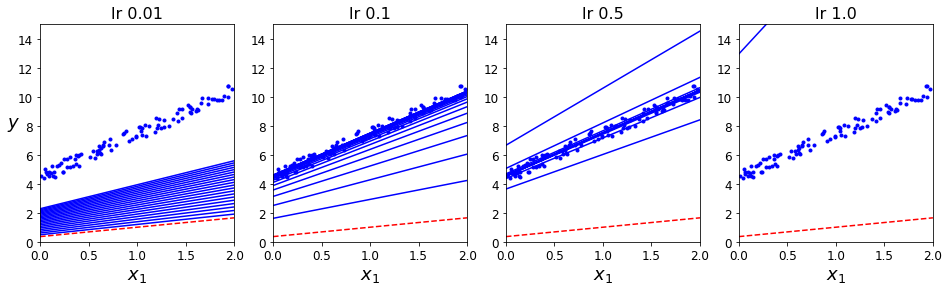

array([[2.6115271 ],
       [1.97654865],
       [2.90737389]])

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.subplot(144); plot_gradient_descent(initial_weight, 1.0)
plt.show()

weight_path_bgd[-1]

Problem 3: MNIST Digit Averages

Reference - https://colab.research.google.com/drive/11FwHS2s0QMI5LlGDFbt_dBFuGpc-pOxx#scrollTo=02FA0zxcghOn

Calculate Average

In [0]:
# load dataset from keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
l = len(train_images)

# create empty arrays
avg = np.zeros((10, 28, 28))
freq = np.zeros((10, 1, 1))

# sum images
for i in np.arange(l):
  label = train_labels[i]
  avg[label] += train_images[i]
  freq += 1

# divide by number of digits
avg /= freq

Display Function

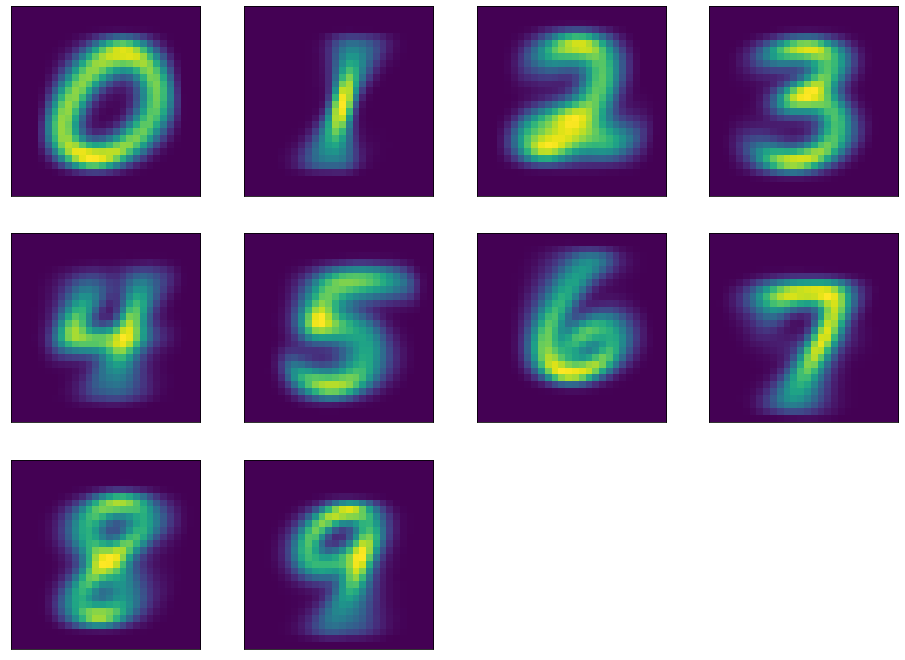

In [0]:
def display():
  plt.figure(figsize=(16,16))

  # for each digit print average
  for i in np.arange(10):
    plt.subplot(4, 4, 1 + i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(avg[i])

  plt.show()

display()